In [1]:
#Imports
import pandas as pd

In [2]:
#Load dataset into pandas DataFrame
games = pd.read_csv('steam_games.csv', sep=',', encoding='latin-1', usecols=['name', 'steamspy_tags'])

In [3]:
#Features need to be extracted before I compute simularity
#Import term frequency-inverse document frequency (tfidf) module using scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
#Define tfidf vectorizer object & remove unnecessary words
tf = TfidfVectorizer(stop_words='english')
#Replace not-a-number values with blank string
games['steamspy_tags'] = games['steamspy_tags'].fillna('')
#Construct tfidf matrix by fitting and transforming data
tfidf_matrix = tf.fit_transf orm(games['steamspy_tags'])
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(27075, 370)

In [4]:
#Measure the simularity between vectors
#Import cosine_similarity module using scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
#Check cosine simularity between two arrays
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
#Output 4 cols & 4 rows
cosine_sim[:4, :4]

array([[1.        , 1.        , 0.53785954, 1.        ],
       [1.        , 1.        , 0.53785954, 1.        ],
       [0.53785954, 0.53785954, 1.        , 0.53785954],
       [1.        , 1.        , 0.53785954, 1.        ]])

In [5]:
#Create variable 'names' and assign it to game names from dataset
names = games['name']
#Create a reverse array of game names to find index of game in tag_recommendations
indices = pd.Series(games.index, index=games['name'])

In [6]:
#Create function tag_recommendations that takes parameter name
def tag_recommendations(name):
    #Get index of chosen game
    idx = indices[name]
    #Get the pairwise similarity scores of all games with chosen game and put in array
    sim_scores = list(enumerate(cosine_sim[idx]))
    #Sort games based on simularity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #Get the scores of 20 most similar games
    sim_scores = sim_scores[1:21]
    #Get the game indices and put in array
    game_indices = [i[0] for i in sim_scores]
    #Return 20 most similar games
    return names.iloc[game_indices]

In [11]:
#Call function with parameter & return top ten rows
tag_recommendations('Counter-Strike').head(10)

1                 Team Fortress Classic
3                    Deathmatch Classic
5                              Ricochet
7        Counter-Strike: Condition Zero
10               Counter-Strike: Source
13              Half-Life 2: Deathmatch
15         Half-Life Deathmatch: Source
60                     Bloody Good Time
203    Call of Duty® 4: Modern Warfare®
258    Call of Duty®: Modern Warfare® 2
Name: name, dtype: object

# Introduction
In this assignment, I was required research various applications of AI including their strengths and limitations. I was also required to research recommender systems, and then create a content-based recommender system using the Python programming language.

Before I get started, I would like to define artificial intelligence. Artificial intelligence (AI) is the ability of a computer to perform tasks or make decisions requiring human intelligence. An example of this is self-driving cars, which use AI to replicate driving like a human would. In the next section, I will share my research of the applications of AI, and the state of the market.

# Applications of AI
According to the company Gartner, in 2015, just ten percent of organisations reported that they either are already using artificial intelligence technology, or they would be doing so in the near future. In 2019, that number rose to 37%, meaning more than one in three organisations are either using artificial intelligence or have plans to do so. Now in 2021, that figure is no doubt even higher, and AI’s market’s growth is expected to keep growing for many years.

So in what ways are businesses using AI, and how can it benefit them? Well AI has many different commercial applications, some of them are fairly simple, like fraud detection, which uses pattern recognition to detect unusual activity. And then there are more complex applications such as self-driving cars. Self-driving cars are much more complex because there are many variables that the software needs to account for. Teaching a car to stay in its lane by following the white lines on the road may be easy enough, but overcoming problems, such as a section of road with no white lines, or a pedestrian running across the road need to be accounted for. Tesla uses machine learning to gather data from every Tesla driving on the road to improve the self-driving software in the cars.

AI has many other commercial applications including chat bots, virtual assistants, robots, recommender systems, video games and a wide variety of others.

One application I found during my research of AI that I would like to highlight is a company called Palantir, and their three products Gotham, Metropolis, and Foundry. Palantir sells some of, if not the most advanced AI products on the market. In 2011, the company’s tech helped locate Osama bin Laden, and is now being used  to trace COVID-19 infections, track medical supply chains, and even predict outbreaks in pandemic hot zones.

Palantir’s Gotham is used by counter-terrorism analysts in the United States Intelligence Community and the United States Department of Defense. Metropolis is used by financial services such as banks and hedge funds. Foundry is used by commercial clients such as Airbus, Merck, and BP. BP is one of the largest energy companies in the world, and Foundry generated more than 1 billion dollars of value for them in 2020. Foundry also helped BP optimize wind farms, electrical charging networks, solar power generation, and other aspects of the energy giant’s net zero emission targets.

I believe this one company conveys the magnitude of AI, its applications, and its market potential in the future.
 
## Strengths
An advantage of AI applications is a reduction in human error. Software is less likely to make a mistake than a human if it is programmed properly and is being used in the right setting.

Another advantage is speed. An AI can sort through endless amounts of data quickly.

Another advantage is efficiency. Computers don’t get tired or lose focus like a human, even if the work is tedious and repetitive. The computers are also available around the clock, and do not need to take breaks. Humans only work on average 8 hours a day, excluding breaks.

Another advantage is cost. There are many areas where it is cheaper to use AI, than it would be to hire people to do the same work.

Another advantage is decision making. There are some scenarios where data can be analysed to tell what the better decision is, and in some cases, an AI would be able to sieve through that data and quickly be able to tell the best solution.

Another advantage of AI is powering innovation. New commercial markets such as self-driving cars are born from AI.

A last advantage is that the AI can potentially improve over time. Data can be collected through use to be able to improve. For example, Tesla collects data from their self-driving cars and uses machine leaning to improve their own self-driving software.

## Limitations
A limitation of AI is unemployment. There is an ethical factor to consider with AI as it could make many people redundant, and there are protests, organisations, and people actively fighting against replacing people with AI making it harder to implement.

Another limitation is AI can be maladaptive. Software can only do what it is told to do, so if problems arise then it is likely that human intervention will be needed.

Another limitation is emotion. Emotion could be a key part of the decision-making process depending on the decisions being made. Creativity or thinking outside of the box also requires emotion so AI is not useful in all cases.

A last limitation of AI is cost. There are cases where AI could save money in a company, but the hardware and sometimes software can be very costly, and then there is also the cost for upkeep and maintenance.

# Recommender Systems
One of the applications of AI I pointed out in the ‘Applications of AI’ section was recommender systems. I would now like to focus on recommender systems and share my research on them.

Firstly, what is a recommender system? A recommender system is an algorithm that returns items to the user based on their relevancy. An example of this is when you come to the end of a YouTube video, and new videos are recommended that YouTube thinks are relevant to you. There are different ways to determine what is ‘relevant’, but if you watch mainly cooking videos, then YouTube’s recommender system should know that cooking videos are more relevant to you and will recommend cooking videos. Another example is Netflix, which recommends movies on the main page that it thinks you’ll like based on previously watched content. If you generally watch movies of a certain genre, like horror movies, then Netflix’s recommender system should recommend movies of that genre, because it is more relevant to you.

The two main types of recommender systems are content-based systems and collaborative filtering systems. In the next section, I will explain both types and outline the differences and benefits/weaknesses of each system.

## Content-Based Approach
A content-based approach recommends items based on properties/features of those items. For example, you could recommend movies with the same director as another movie. Using this example, if you watched Django Unchained, the recommender system would recommend other movies directed by Quentin Tarantino such as Pulp Fiction.

The benefits of content-based filtering include being able to store a profile on a user based on what they like and then recommend items based on interests from that profile.

Another benefit is being able to recommend niche items that the majority of other users aren’t interested in.

A drawback of this approach is that recommendations can only be made on the user’s existing interests. So for example, if the user was brand new, there would be no data to be able to recommend the user movies.

## Collaborative Approach
A collaborative approach recommends items based on other users’ behaviour or trends. For example, you could look at a certain movie, and then check what movies other users watched that also watched that certain movie. Using this example, if you watched Kung Fu Panda, and many people who watched Kung Fu Panda also watched Ice Age, then the recommender system would recommend Ice Age.

The benefits of collaborative filtering are that the items do not need to have many properties or features to work, and this system can help users discover new interests.

A drawback of this approach is cold-start problem where the system requires previous user interaction, so if an item is new, then there is not enough data of other people interacting with this object.

# My Recommender System Title
Steam game recommender.

## Description
Steam is Valve’s PC application that allows you to buy and play PC games. It is the biggest PC storefront and has over one billion accounts. In 2020 there were approximately 120 million monthly active players.

My recommender system is a content-based system that recommends Steam games to the user with similar tags. Tags are assigned to a Steam game depending on its features, for example, a Call of Duty game would have the tags ‘Action’, ‘Multiplayer’, and ‘FPS’. I decided to recommend based on tags instead of something like genre because I would get more accurate results.

## Implementation
To implement my recommender system, I started by locating a dataset. I found a Steam games dataset online and downloaded it as an excel file. I renamed the excel file to ‘steam_games’ and then uploaded it to Jupyter.
I then created a new Python 3 file in Jupyter called ‘SteamRecommenderSystem’. I then began working on the code and in the first cell, I imported my libraries. The only package I needed to import was ‘pandas’ which lets me manipulate data, and I called it ‘pd’. You can see this in figure 1 below.
 
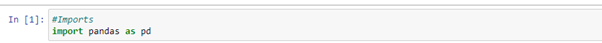
Figure 1 - Importing libraries

Next, I moved to a new cell to load in my data. In figure 2 below, you can see I’m loading the data from the Steam games dataset that I uploaded to Jupyter into a pandas DataFrame called ‘games’.

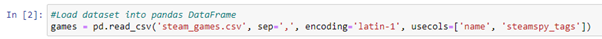
Figure 2 - Importing data

Then I set out on making the system recommend games based on the Steam tags assigned to a game. In this cell, I import TfidfVectorizer using scikit-learn. I then define a tfidf vectorizer object and remove any unnecessary words such as ‘a’ or ‘the’ which won’t help us at all when we are trying to find recommendations. I also replace not-a-number values in my tags data with a blank string, which can help avoid errors when we vectorize data. I then make a matrix and assign it to the transformed data of my tags from the dataset. You can see all this in figure 3 below.
 
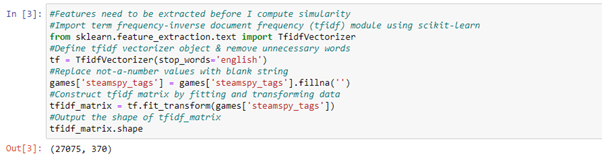
Figure 3 - Vectorize data and put in a matrix

Next, I import cosine_similarity using scikit-learn, and then make an array called cosine_sim and then assign it to the result of cosine_similarity(tfidf_matrix, tfidf_matrix). cosine_similatrity is an equation that takes tfidf_matrix as both of its parameters. You can see this in figure 4 below.
 
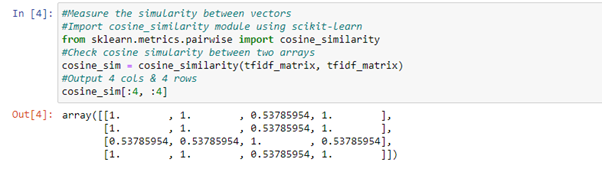
Figure 4 - Cosine Similarity

I then created an array called names and assign it to the names of the games from my dataset. After that, I create a reverse array of those game names that I can use later to find index of a game. You can see all this in figure 5 below.
 
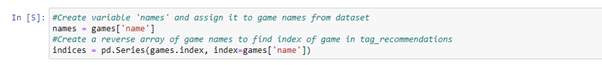
Figure 5 - Indices

Next, we make a new function called ‘tag_recommendations’, which takes in the parameter ‘name’. I then get the index of the parameter passed in (name). Next, I create an array called sim_scores and assign it to the index of the passed in parameter checked against the cosine_sim array I created in figure 4. I then sort the sim_scores array by games with the most similar tags as the game passed through as the parameter for tag_recommendations. I then assign the sim_scores variable to the top 20 results of the most similar games. Then I make a new array called game_indices and assign it to a for loop that gets the top 20 most similar games’ indices. Lastly, I return the names of the games for each of those indices. You can see all this in figure 6 below.

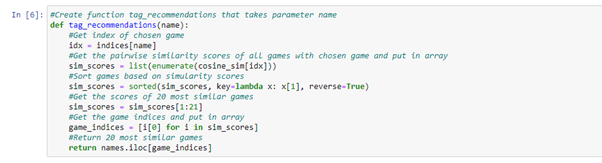
Figure 6 - Function

Finally, I call the function ‘tag_recommendations’ that we set up in figure 6, and in this case, I used the name ‘Counter-Strike’, a popular FPS game as the game to pass through. I’m only returning the top ten rows as dictated by the head() function. You can see this in figure 7.
 
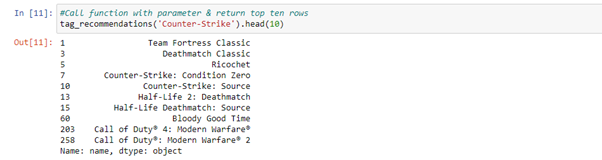
Figure 7 - Calling function and results

The ten games that are returned are all similar to Counter-Strike. Two of the games returned are even other games from the Counter Strike franchise.

# References
Daley, S. (2021, October 26). 27 Examples of Artificial Intelligence Shaking Up Business as Usual. Built In. https://builtin.com/artificial-intelligence/examples-ai-in-industryGartner

Survey Shows 37 Percent of Organizations Have Implemented #AI. (2019, January 21). Gartner. https://www.gartner.com/en/newsroom/press-releases/2019-01-21-gartner-survey-shows-37-percent-of-organizations-haveKumar, S. (2020, May 5).

Advantages and Disadvantages of Artificial Intelligence. Medium. https://towardsdatascience.com/advantages-and-disadvantages-of-artificial-intelligence-182a5ef6588cMarr, B. (2019, December 9).

The 10 Best Examples Of How Companies Use Artificial Intelligence In Practice. Forbes. https://www.forbes.com/sites/bernardmarr/2019/12/09/the-10-best-examples-of-how-companies-use-artificial-intelligence-in-practice/

Palantir & bp Deepen Partnership, Accelerate Energy Transition. (2021, February 5). Business Wire. https://www.businesswire.com/news/home/20210205005057/en/Palantir-bp-Deepen-Partnership-Accelerate-Energy-

Transitionpandas.DataFrame — pandas 1.3.4 documentation. (2021). Pandas. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.htmlSmith, C. (2021, June 6).

Palantir. DMR. https://expandedramblings.com/index.php/palantir-statistics/Statista. (2021, September 27). Number of peak concurrent Steam users 2013–2021. https://www.statista.com/statistics/308330/number-stream-users/Tabora, V. (2021, September 17).

Content Based Filtering In Recommendation System Using Jupyter Colab Notebook. Medium. https://medium.com/0xcode/content-based-filtering-in-recommendation-system-using-jupyter-colab-notebook-9d3e0520af8Team, D. (2018, January 16).

Pros and Cons of Artificial Intelligence – A Threat or a Blessing? DataFlair. https://data-flair.training/blogs/artificial-intelligence-advantages-disadvantages/